In [3]:
import math
import random

a = 2
b = 5
N = 100000
M = 15
area = []

for m in range(M):
    inside = 0 # initialize the count
    for i in range(N):
        x = random.uniform(-a, a) # uniformly distributed random numbers
        y = random.uniform(-b, b)
        if (x/a)**2 + (y/b)**2 <= 1: # find how many inside
            inside += 1
    rect = (2*a) * (2*b) # take the rectange area
    MC_area = (inside/N) *rect # find area using MC
    area.append(MC_area)

average = sum(area)/len(area)
print('average is ', average)
real_area = math.pi*a*b # find actual area of ellipse
print('actual area is ', real_area)
area

average is  31.3932
actual area is  31.41592653589793


[31.3604,
 31.407600000000002,
 31.402,
 31.366,
 31.394799999999996,
 31.4128,
 31.436,
 31.3588,
 31.316799999999997,
 31.368399999999998,
 31.4548,
 31.468799999999998,
 31.413600000000002,
 31.3428,
 31.3944]

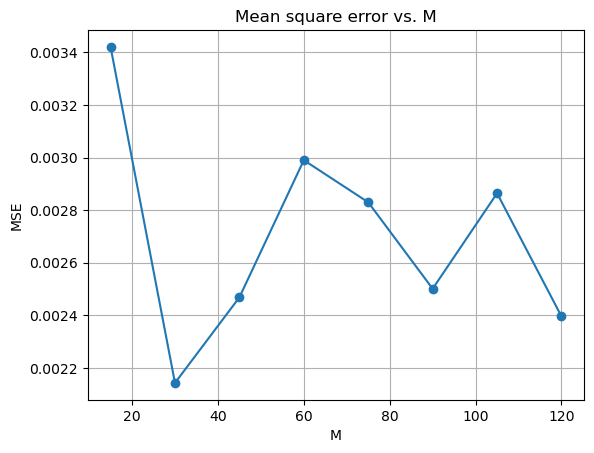

In [4]:
import math
import random
import matplotlib.pyplot as plt

a = 2
b = 5
N = 100000 # here we fix N to show the scaling with M
M_values = [15, 30, 45, 60, 75, 90, 105, 120]


def MC_ellipse(a, b, N, M):
    area = []
    for m in range(M):
        inside = 0 # initialize the count
        for i in range(N):
            x = random.uniform(-a, a) # uniformly distributed random numbers
            y = random.uniform(-b, b)
            if (x/a)**2 + (y/b)**2 <= 1: # find how many inside
                inside += 1
        rect = (2*a) * (2*b) # take the rectange area
        MC_area = (inside/N) *rect # find area using MC
        area.append(MC_area)
    return area

real_area = math.pi*a*b # find actual area of ellipse
error = []

for M in M_values:
    MC_areas = MC_ellipse(a, b, N, M)
    total_mse = 0
    for area in MC_areas:
        mse = (area - real_area)**2 # to get each squared error
        total_mse += mse # mean squared error
    error.append(total_mse/M)

# plot    
plt.plot(M_values, error, marker='o')
plt.title('Mean square error vs. M')
plt.xlabel('M')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

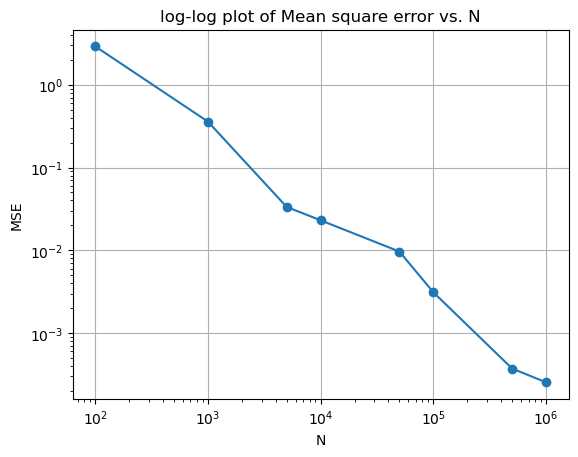

In [5]:
import math
import random
import matplotlib.pyplot as plt

a = 2
b = 5
N_values = [100, 1000, 5000, 10000, 50000, 100000, 500000, 1000000] 
M = 15 # here we fix M to show the scaling with N


def MC_ellipse(a, b, N, M):
    area = []
    for m in range(M):
        inside = 0 # initialize the count
        for i in range(N):
            x = random.uniform(-a, a) # uniformly distributed random numbers
            y = random.uniform(-b, b)
            if (x/a)**2 + (y/b)**2 <= 1: # find how many inside
                inside += 1
        rect = (2*a) * (2*b) # take the rectange area
        MC_area = (inside/N) *rect # find area using MC
        area.append(MC_area)
    return area

real_area = math.pi*a*b # find actual area of ellipse
error = []

for N in N_values:
    MC_areas = MC_ellipse(a, b, N, M)
    total_mse = 0
    for area in MC_areas:
        mse = (area - real_area)**2 # to get each squared error
        total_mse += mse # mean squared error
    error.append(total_mse/M)

# plot    
plt.loglog(N_values, error, marker='o')
plt.title('log-log plot of Mean square error vs. N')
plt.xlabel('N')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

Fixing N will fix the number of points in MC simulation, and changing M will change the number of runs of MC. Therefore, there is no clear pattern when increasing M, it does not necessarily help increase the accuracy. And the runtime increases a lot by increasing M.

Oppositely, when we fixed M and increase N, it is well-understood that larger number of points in MC simulation can improve accuracy by increasing sample size. According to the log-log plot, the error decreases in a clear pattern. 